## フィルタ設計

### ローパスフィルター

零点が実軸上の原点より左側の位置にあればよい。

例えば
$$
H(z) = \frac{(z + 1)^2}{z^2} \\
        = 1 + 2z + z^{-2}\\
\therefore y[n] = x[n] + 2x[n - 1] + x[x -2]
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 48000

Text(0, 0.5, 'Amplitude [dB]')

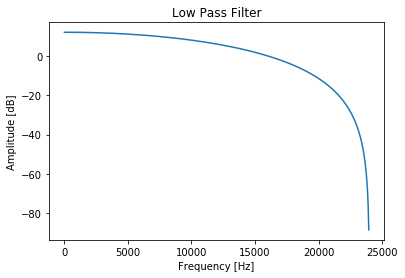

In [2]:
from scipy.signal import lfilter, freqz

b = [1, 2, 1]
a = [1]

w, h = freqz(b, a, fs=fs)

plt.plot(w, 20*np.log10(np.abs(h)))
plt.title('Low Pass Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')

### ハイパスフィルター

零点が実軸上の原点より右側の位置ににあればよい。

例えば
$$
H(z) = \frac{(z - 1)^2}{z^2} \\
        = 1 + 2z + z^{-2}\\
\therefore y[n] = x[n] - 2x[n - 1] + x[x -2]
$$

/Users/takashiminagawa/.pyenv/versions/3.6.5/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


Text(0, 0.5, 'Amplitude [dB]')

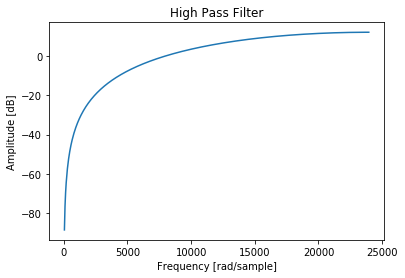

In [3]:
b = [1, -2, 1]
a = [1]

w, h = freqz(b, a, fs=fs)

plt.plot(w, 20*np.log10(np.abs(h)))
plt.title('High Pass Filter')
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('Amplitude [dB]')

### ノッチフィルタ

極が任意の周波数に対応する角度の位置にあり、単位円の内側にあればよい

例えば

$$
z_1 = \frac{2 + j\sqrt{3}}{2}\\
z_2 = \frac{2 - j\sqrt{3}}{2}\\
H(z) = \frac{z^2}{(z - z_1)(z - z_2)} \\
        = \frac{1}{1 - (z_1 + z_2)z + z_1z_2z^{-2}}\\
\therefore y[n] - (z_1 + z_2)y[n -1] + z_1z_2y[n-2] = x[n]
$$

Text(0, 0.5, 'Amplitude [dB]')

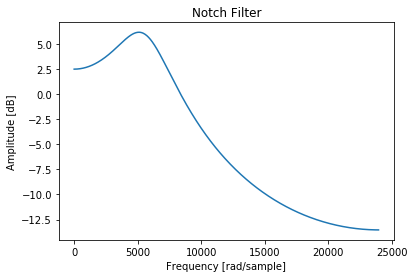

In [4]:
z1 = 0.5 * complex(2, np.sqrt(3))
z2 = 0.5 * complex(2, -np.sqrt(3))


b = [1]
a = [1, -(z1 + z2) , z1 * z2]

w, h = freqz(b, a, fs=fs)

plt.plot(w, 20*np.log10(np.abs(h)))
plt.title('Notch Filter')
plt.xlabel('Frequency [rad/sample]')
plt.ylabel('Amplitude [dB]')